https://github.com/geohackweek/tutorial_contents/blob/master/visualization/notebooks/foliumTutorial.ipynb

### Different icons
* https://getbootstrap.com/docs/3.3/components/

In [2]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import folium
import pandas as pd
import json

In [3]:
cd ~/wx-data/

/Users/chowdahead/wx-data


In [4]:
cd 2021_03_18/current_hazards/

/Users/chowdahead/wx-data/2021_03_18/current_hazards


In [5]:
ls

YAYUR.html               current_hazards.geojson  current_hazards.shx
current_hazards.cpg      current_hazards.prj
current_hazards.dbf      current_hazards.shp


In [40]:
! ogr2ogr -f GeoJSON -t_srs EPSG:4326 current_hazards.geojson current_hazards.shp

In [86]:
#path = "/Users/chowdahead/wx-data/2021_03_18/current_hazards/"
#warnings = gpd.read_file(f'{path}current_hazards.shp')

#dbf, prj, shp, shx = [filename for filename in filenames]
print("\ngrab the shapefile data\n--------------------------")
shp =  "/Users/chowdahead/wx-data/2021_03_18/current_hazards/current_hazards.shp"
#shp = "conus_QPRCTL90_f072/conus_QPRCTL90_2014070912f072.shp"
#shp="99q_2020010900/99q0900.shp"
#shp = "day2_psnow_gt_12_2020010900/wwd_day2_psnow_gt_12.shp"
"""
 current_all.shp
x current_all.shx
x current_all.dbf
x current_all.cpg
x current_all.prj
"""
hazshp = gpd.read_file(shp)
print("Shape of the dataframe: {}".format(hazshp.shape))
print("Projection of dataframe: {}".format(hazshp.crs))
print(warnshp.head()) #last 5 records in dataframe


print("\n\ngrab the geojson file data\n--------------------------")
jsonfile='/Users/chowdahead/wx-data/2021_03_18/current_hazards/current_hazards.geojson'

with open(jsonfile) as f:
    hazjson = json.load(f)

# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
print("warning data keys:",hazjson.keys())
#print("\nwarning data features:",warnjson['features'][0])
print("\n\nwarning data features-properties:",hazjson['features'][0]["properties"])
#print("\nwarning data features:",warnjson['features'][0]["properties"]["geometries"])



grab the shapefile data
--------------------------
Shape of the dataframe: (719, 14)
Projection of dataframe: epsg:4326
                                              CAP_ID  \
0  urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92dea...   
1  urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92dea...   
2  urn:oid:2.49.0.1.840.0.7e59e3d5db6bf3d146078ab...   
3  urn:oid:2.49.0.1.840.0.2e4df0bec1e37aa7f8e91c6...   
4  urn:oid:2.49.0.1.840.0.ce5cbd320b9216ed5b28516...   

                                               VTEC PHENOM SIG   WFO EVENT  \
0  /O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/     SC   Y  KMQT  0023   
1  /O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/     SC   Y  KMQT  0023   
2  /O.CON.KOHX.FL.Y.0033.000000T0000Z-000000T0000Z/     FL   Y  KOHX  0033   
3  /O.NEW.KSGX.SC.Y.0016.210320T1700Z-210321T0800Z/     SC   Y  KSGX  0016   
4  /O.CON.KSTO.WW.Y.0016.000000T0000Z-210320T0700Z/     WW   Y  KSTO  0016   

                    ISSUANCE                 EXPIRATION  \
0  2021-03-19T

In [87]:
hazjson['features'][0]["properties"]

{'CAP_ID': 'urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92deabd942ece97494203d.001.1',
 'VTEC': '/O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/',
 'PHENOM': 'SC',
 'SIG': 'Y',
 'WFO': 'KMQT',
 'EVENT': '0023',
 'ISSUANCE': '2021-03-19T16:44:00-04:00',
 'EXPIRATION': '2021-03-20T00:45:00-04:00',
 'ONSET': '2021-03-20T15:00:00-04:00',
 'ENDS': '2021-03-21T20:00:00-04:00',
 'URL': 'https://alerts-v2.weather.gov/#/?id=urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92deabd942ece97494203d.001.1',
 'MSG_TYPE': 'MWW',
 'PROD_TYPE': 'Small Craft Advisory'}

In [89]:
hazjson['features'][0]["geometry"]["coordinates"][0]

[[-86.092589, 45.965127],
 [-86.0921959, 45.964944],
 [-86.0914764, 45.9649467],
 [-86.089967, 45.965425],
 [-86.0879274, 45.9657755],
 [-86.0860671, 45.9659538],
 [-86.083641, 45.9659538],
 [-86.0797729, 45.9656791],
 [-86.076329, 45.965542],
 [-86.072067, 45.965313],
 [-86.068789, 45.964971],
 [-86.0638427, 45.9644012],
 [-86.0608901, 45.9639663],
 [-86.05548, 45.963051],
 [-86.052103, 45.962388],
 [-86.050956, 45.962205],
 [-86.047941, 45.961519],
 [-86.04722, 45.96145],
 [-86.0459442, 45.9611778],
 [-86.042302, 45.9602829],
 [-86.0393859, 45.959848],
 [-86.0365676, 45.9593467],
 [-86.0340728, 45.9587745],
 [-86.0290298, 45.9578361],
 [-86.0239486, 45.9567146],
 [-86.015035, 45.954881],
 [-86.0105449, 45.953919],
 [-86.0006027, 45.951332],
 [-85.9999274, 45.951321],
 [-85.9988708, 45.9509696],
 [-85.99182, 45.948845],
 [-85.9916839, 45.9488334],
 [-85.9892272, 45.9480476],
 [-85.9845733, 45.9466552],
 [-85.982511, 45.94606],
 [-85.979298, 45.945011],
 [-85.973136, 45.942818],
 [-85.

In [88]:
hazshp.columns

Index(['CAP_ID', 'VTEC', 'PHENOM', 'SIG', 'WFO', 'EVENT', 'ISSUANCE',
       'EXPIRATION', 'ONSET', 'ENDS', 'URL', 'MSG_TYPE', 'PROD_TYPE',
       'geometry'],
      dtype='object')

In [90]:
hazshp2 = hazshp.loc[:, ['geometry', 'PROD_TYPE']]
hazshp_group = hazshp2.groupby('PROD_TYPE')
"hazard data properties",hazjson['features'][0]["properties"]
hazshp_group.groups.keys()

dict_keys(['Beach Hazards Statement', 'Brisk Wind Advisory', 'Coastal Flood Advisory', 'Coastal Flood Warning', 'Coastal Flood Watch', 'Fire Weather Watch', 'Flood Advisory', 'Flood Warning', 'Flood Watch', 'Frost Advisory', 'Gale Warning', 'Gale Watch', 'Hazardous Seas Warning', 'Heavy Freezing Spray Warning', 'High Surf Advisory', 'High Wind Watch', 'Lake Wind Advisory', 'Rip Current Statement', 'Small Craft Advisory', 'Wind Advisory', 'Winter Storm Warning', 'Winter Weather Advisory'])

In [91]:
hazard = hazshp[warnshp.PROD_TYPE.isin(hazshp.PROD_TYPE.unique())]
print("%d stations with some hazard types:" % (len(hazard)))
print(f"{set(hazshp.PROD_TYPE)}")

719 stations with some hazard types:
{'Coastal Flood Watch', 'Winter Storm Warning', 'Heavy Freezing Spray Warning', 'Winter Weather Advisory', 'Beach Hazards Statement', 'Lake Wind Advisory', 'Gale Warning', 'Coastal Flood Warning', 'Frost Advisory', 'Rip Current Statement', 'High Wind Watch', 'Fire Weather Watch', 'Flood Warning', 'Wind Advisory', 'Brisk Wind Advisory', 'Flood Advisory', 'High Surf Advisory', 'Gale Watch', 'Flood Watch', 'Small Craft Advisory', 'Hazardous Seas Warning', 'Coastal Flood Advisory'}


---

//

---

In [92]:
colors = pd.read_csv('/Users/chowdahead/Jupyter/Jupyter_Notebooks/color_data.txt', delimiter='\t')
#colors.index = colors.text.str.lower()
colors.index = colors.text
colors.replace('-', '')
colors.head(30)

,code,r,g,b,text
text,,,,,
Heavy Snow,1,253,244,63,Heavy Snow
Small Craft Advisory,1.1,152,123,93,Small Craft Advisory
Wind Advisory,1.10,245,159,245,Wind Advisory
Wind Chill Advisory,1.11,132,90,156,Wind Chill Advisory
Blizzard Warning,1.1.1,255,255,213,Blizzard Warning
Dense Fog Advisory,1.12,236,180,0,Dense Fog Advisory
Avalanche Warning,1.1.2,255,250,233,Avalanche Warning
High Surf Advisory,1.1.3,255,250,200,High Surf Advisory
Winter Storm Warning,1.1.4,7,105,129,Winter Storm Warning


In [60]:
for index, row in hazard.iterrows():
    print(row)

CAP_ID        urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92dea...
VTEC           /O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KMQT
EVENT                                                      0023
ISSUANCE                              2021-03-19T16:44:00-04:00
EXPIRATION                            2021-03-20T00:45:00-04:00
ONSET                                 2021-03-20T15:00:00-04:00
ENDS                                  2021-03-21T20:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-86.092589 45.965127, -86.0921958999...
Name: 0, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92dea...
VTEC           /O

CAP_ID        urn:oid:2.49.0.1.840.0.6cda5655fb14557df41065e...
VTEC           /O.NEW.KJAX.GL.W.0003.210320T1200Z-210321T0600Z/
PHENOM                                                       GL
SIG                                                           W
WFO                                                        KJAX
EVENT                                                      0003
ISSUANCE                              2021-03-19T15:38:00-04:00
EXPIRATION                            2021-03-20T05:00:00-04:00
ONSET                                 2021-03-20T08:00:00-04:00
ENDS                                  2021-03-21T02:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                          Gale Warning
geometry      POLYGON ((-80.9369353 31.2375448, -80.84990089...
Name: 41, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.6cda5655fb14557df41065e...
VTEC           /

CAP_ID        urn:oid:2.49.0.1.840.0.2d12c1a03ff3fd8274de2ad...
VTEC           /O.NEW.KCHS.GL.A.0005.210320T2200Z-210322T1200Z/
PHENOM                                                       GL
SIG                                                           A
WFO                                                        KCHS
EVENT                                                      0005
ISSUANCE                              2021-03-19T15:33:00-04:00
EXPIRATION                            2021-03-19T23:45:00-04:00
ONSET                                 2021-03-20T18:00:00-04:00
ENDS                                  2021-03-22T08:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                            Gale Watch
geometry      POLYGON ((-80.8413135 32.0194555, -80.53284840...
Name: 58, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.2d12c1a03ff3fd8274de2ad...
VTEC           /

CAP_ID        urn:oid:2.49.0.1.840.0.35346ba47480e8cc0ea55b5...
VTEC           /O.EXT.KMHX.GL.W.0006.000000T0000Z-210321T1200Z/
PHENOM                                                       GL
SIG                                                           W
WFO                                                        KMHX
EVENT                                                      0006
ISSUANCE                              2021-03-19T15:20:00-04:00
EXPIRATION                            2021-03-20T03:30:00-04:00
ONSET                                 2021-03-19T15:20:00-04:00
ENDS                                  2021-03-21T08:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                          Gale Warning
geometry      (POLYGON ((-76.0002777 35.0682138, -75.7041339...
Name: 90, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.35346ba47480e8cc0ea55b5...
VTEC           /

CAP_ID        urn:oid:2.49.0.1.840.0.35346ba47480e8cc0ea55b5...
VTEC           /O.CON.KMHX.GL.W.0006.000000T0000Z-210320T1200Z/
PHENOM                                                       GL
SIG                                                           W
WFO                                                        KMHX
EVENT                                                      0006
ISSUANCE                              2021-03-19T15:20:00-04:00
EXPIRATION                            2021-03-20T03:30:00-04:00
ONSET                                 2021-03-19T15:20:00-04:00
ENDS                                  2021-03-20T08:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                          Gale Warning
geometry      POLYGON ((-75.7823843 35.9327701, -75.78557960...
Name: 100, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.5fe15869b6c2c9f61d054fe...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.b1c3dc73535d6bae9de32c2...
VTEC           /O.NEW.KOKX.SC.Y.0033.210319T1908Z-210320T1500Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KOKX
EVENT                                                      0033
ISSUANCE                              2021-03-19T15:08:00-04:00
EXPIRATION                            2021-03-20T11:00:00-04:00
ONSET                                 2021-03-19T15:08:00-04:00
ENDS                                  2021-03-20T11:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-72.74936719999999 40.7655265, -72.6...
Name: 159, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.b1c3dc73535d6bae9de32c2...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.a2d5540435e217a674e024a...
VTEC           /O.EXA.KGYX.SC.Y.0026.000000T0000Z-210320T0600Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KGYX
EVENT                                                      0026
ISSUANCE                              2021-03-19T14:57:00-04:00
EXPIRATION                            2021-03-20T02:00:00-04:00
ONSET                                 2021-03-19T14:57:00-04:00
ENDS                                  2021-03-20T02:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      (POLYGON ((-68.63560099999999 44.017423, -68.6...
Name: 173, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.a2d5540435e217a674e024a...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.14cf98cab386aa6e9991702...
VTEC           /O.NEW.KAKQ.SC.Y.0032.210319T1827Z-210320T1100Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KAKQ
EVENT                                                      0032
ISSUANCE                              2021-03-19T14:27:00-04:00
EXPIRATION                            2021-03-19T22:30:00-04:00
ONSET                                 2021-03-19T14:27:00-04:00
ENDS                                  2021-03-20T07:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-76.496584 37.748068, -76.4972170000...
Name: 199, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.14cf98cab386aa6e9991702...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.be6277bc3a730a03d504672...
VTEC           /O.CON.KAKQ.CF.W.0001.000000T0000Z-210320T1000Z/
PHENOM                                                       CF
SIG                                                           W
WFO                                                        KAKQ
EVENT                                                      0001
ISSUANCE                              2021-03-19T14:14:00-04:00
EXPIRATION                            2021-03-19T22:15:00-04:00
ONSET                                 2021-03-19T14:14:00-04:00
ENDS                                  2021-03-20T06:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CFW
PROD_TYPE                                 Coastal Flood Warning
geometry      (POLYGON ((-75.7896126 36.2285122, -75.789751 ...
Name: 228, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.be6277bc3a730a03d504672...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.ceb4cc35aa865ecaf20c288...
VTEC           /O.CON.KMOB.SC.Y.0013.000000T0000Z-210320T1600Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KMOB
EVENT                                                      0013
ISSUANCE                              2021-03-19T12:12:00-05:00
EXPIRATION                            2021-03-19T20:00:00-05:00
ONSET                                 2021-03-19T12:12:00-05:00
ENDS                                  2021-03-20T11:00:00-05:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      (POLYGON ((-88.3475952 30.4030761, -88.343811 ...
Name: 259, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.ceb4cc35aa865ecaf20c288...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.0cd52b8a0ef8308b82a3f0e...
VTEC           /O.CON.KSEW.SC.Y.0061.000000T0000Z-210320T1200Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KSEW
EVENT                                                      0061
ISSUANCE                              2021-03-19T08:38:00-07:00
EXPIRATION                            2021-03-19T16:45:00-07:00
ONSET                                 2021-03-19T08:38:00-07:00
ENDS                                  2021-03-20T05:00:00-07:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-124.0548858 47.0413665, -124.053916...
Name: 329, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.0cd52b8a0ef8308b82a3f0e...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.fa18d2f08ad30c4478a82da...
VTEC           /O.CON.PHFO.SU.Y.0019.000000T0000Z-210321T0400Z/
PHENOM                                                       SU
SIG                                                           Y
WFO                                                        PHFO
EVENT                                                      0019
ISSUANCE                              2021-03-19T04:13:00-09:00
EXPIRATION                            2021-03-19T17:15:00-09:00
ONSET                                 2021-03-19T04:13:00-09:00
ENDS                                  2021-03-20T19:00:00-09:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CFW
PROD_TYPE                                    High Surf Advisory
geometry      POLYGON ((-159.40486 22.2360294, -159.4045632 ...
Name: 410, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.fa18d2f08ad30c4478a82da...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.0b38b90c72c020e354835c6...
VTEC           /O.CON.PAJK.WW.Y.0025.000000T0000Z-210320T0300Z/
PHENOM                                                       WW
SIG                                                           Y
WFO                                                        PAJK
EVENT                                                      0025
ISSUANCE                              2021-03-19T04:44:00-08:00
EXPIRATION                            2021-03-19T13:00:00-08:00
ONSET                                 2021-03-19T04:44:00-08:00
ENDS                                  2021-03-19T19:00:00-08:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    WSW
PROD_TYPE                               Winter Weather Advisory
geometry      (POLYGON ((-133.5596789 57.2201069, -133.55943...
Name: 422, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.0b38b90c72c020e354835c6...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.14c9b2ac3e4eb8b83bc2fe4...
VTEC           /O.NEW.PAJK.SC.Y.6545.210319T1100Z-210320T1300Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        PAJK
EVENT                                                      6545
ISSUANCE                              2021-03-19T03:55:00-08:00
EXPIRATION                            2021-03-19T22:00:00-08:00
ONSET                                 2021-03-19T03:00:00-08:00
ENDS                                  2021-03-20T05:00:00-08:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CWF
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-137.896544 58.769635, -137.894429 5...
Name: 450, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.14c9b2ac3e4eb8b83bc2fe4...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.e6e68a3b0e255ac6c50c0a5...
VTEC           /O.NEW.KMTR.BH.S.0006.210319T1700Z-210320T0600Z/
PHENOM                                                       BH
SIG                                                           S
WFO                                                        KMTR
EVENT                                                      0006
ISSUANCE                              2021-03-19T03:38:00-07:00
EXPIRATION                            2021-03-19T14:00:00-07:00
ONSET                                 2021-03-19T10:00:00-07:00
ENDS                                  2021-03-19T23:00:00-07:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CFW
PROD_TYPE                               Beach Hazards Statement
geometry      (POLYGON ((-123.003599 37.6932479, -123.004089...
Name: 476, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.e6e68a3b0e255ac6c50c0a5...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.6fb480d60c1e202058b2cae...
VTEC           /O.CON.KLIX.SC.Y.0016.000000T0000Z-210320T1200Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        KLIX
EVENT                                                      0016
ISSUANCE                              2021-03-19T03:45:00-05:00
EXPIRATION                            2021-03-19T11:45:00-05:00
ONSET                                 2021-03-19T03:45:00-05:00
ENDS                                  2021-03-20T07:00:00-05:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-89.97362510000001 29.5363216, -89.9...
Name: 509, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.6fb480d60c1e202058b2cae...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.aece9ab821977ab35640135...
VTEC           /O.NEW.PAFC.SC.Y.6832.210319T1300Z-210320T0100Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        PAFC
EVENT                                                      6832
ISSUANCE                              2021-03-18T15:58:00-08:00
EXPIRATION                            2021-03-19T04:45:00-08:00
ONSET                                 2021-03-19T05:00:00-08:00
ENDS                                  2021-03-19T17:00:00-08:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CWF
PROD_TYPE                                  Small Craft Advisory
geometry      (POLYGON ((-158.6147578 56.2014007, -158.61225...
Name: 537, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.aece9ab821977ab35640135...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.bb1141cdf21de6a38b77747...
VTEC           /O.NEW.PAJK.SC.Y.8724.210318T2300Z-210320T0100Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        PAJK
EVENT                                                      8724
ISSUANCE                              2021-03-18T15:56:00-08:00
EXPIRATION                            2021-03-19T10:00:00-08:00
ONSET                                 2021-03-18T15:00:00-08:00
ENDS                                  2021-03-19T17:00:00-08:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CWF
PROD_TYPE                                  Small Craft Advisory
geometry      POLYGON ((-135.5914894 57.2686307, -135.581824...
Name: 555, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.bb1141cdf21de6a38b77747...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.468083dfe4b5f4bd10bf94c...
VTEC           /O.CON.KCAR.GL.W.0015.210319T0600Z-210320T0000Z/
PHENOM                                                       GL
SIG                                                           W
WFO                                                        KCAR
EVENT                                                      0015
ISSUANCE                              2021-03-18T15:36:00-04:00
EXPIRATION                            2021-03-18T23:45:00-04:00
ONSET                                 2021-03-19T02:00:00-04:00
ENDS                                  2021-03-19T20:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                          Gale Warning
geometry      POLYGON ((-68.4452819 44.5622978, -68.44502249...
Name: 578, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.ee3d9220a034e3c7c7de156...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.d5d74f9868ea10d8618a14f...
VTEC           /O.NEW.PAFC.SC.Y.4106.210318T1100Z-210320T0100Z/
PHENOM                                                       SC
SIG                                                           Y
WFO                                                        PAFC
EVENT                                                      4106
ISSUANCE                              2021-03-18T03:34:00-08:00
EXPIRATION                            2021-03-18T16:45:00-08:00
ONSET                                 2021-03-18T03:00:00-08:00
ENDS                                  2021-03-19T17:00:00-08:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CWF
PROD_TYPE                                  Small Craft Advisory
geometry      (POLYGON ((-147.7608032 61.2131881, -147.76365...
Name: 613, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.d5d74f9868ea10d8618a14f...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.6ce97d4a421acc7172afacf...
VTEC           /O.NEW.KTBW.RP.S.0009.210318T1800Z-210320T1200Z/
PHENOM                                                       RP
SIG                                                           S
WFO                                                        KTBW
EVENT                                                      0009
ISSUANCE                              2021-03-18T04:44:00-04:00
EXPIRATION                            2021-03-18T21:00:00-04:00
ONSET                                 2021-03-18T14:00:00-04:00
ENDS                                  2021-03-20T08:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    CFW
PROD_TYPE                                 Rip Current Statement
geometry      (POLYGON ((-81.8760683 26.4335171, -81.8765182...
Name: 636, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.7d6e7ea8fbd6ce48e2a2f1c...
VTEC           

CAP_ID        urn:oid:2.49.0.1.840.0.15feccafe5eef32e45682b8...
VTEC           /O.NEW.KLWX.GL.W.0010.210319T0600Z-210319T2200Z/
PHENOM                                                       GL
SIG                                                           W
WFO                                                        KLWX
EVENT                                                      0010
ISSUANCE                              2021-03-17T13:48:00-04:00
EXPIRATION                            2021-03-17T22:00:00-04:00
ONSET                                 2021-03-19T02:00:00-04:00
ENDS                                  2021-03-19T18:00:00-04:00
URL           https://alerts-v2.weather.gov/#/?id=urn:oid:2....
MSG_TYPE                                                    MWW
PROD_TYPE                                          Gale Warning
geometry      (POLYGON ((-75.893834 37.92921, -75.894268 37....
Name: 685, dtype: object
CAP_ID        urn:oid:2.49.0.1.840.0.186bb11184b862ab8a44895...
VTEC           

In [94]:
#warning = usa[usa.PROD_TYPE.isin(usa.PROD_TYPE.unique())]
floodadv = hazshp[warnshp.PROD_TYPE.isin(["Flood Advisory"])]
floodadv.head()

#row[row['PROD_TYPE'].str.contains("Flood")]

,CAP_ID,VTEC,PHENOM,SIG,WFO,EVENT,ISSUANCE,EXPIRATION,ONSET,ENDS,URL,MSG_TYPE,PROD_TYPE,geometry
2,urn:oid:2.49.0.1.840.0.7e59e3d5db6bf3d146078ab...,/O.CON.KOHX.FL.Y.0033.000000T0000Z-000000T0000Z/,FL,Y,KOHX,0033,2021-03-19T15:43:00-05:00,2021-03-20T03:45:00-05:00,2021-03-19T15:43:00-05:00,None,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,FLS,Flood Advisory,"POLYGON ((-88.05000 35.47000, -87.87000 35.470..."
5,urn:oid:2.49.0.1.840.0.6e7f4e512ba5da413154bbe...,/O.EXT.KLOT.FL.Y.0009.000000T0000Z-210321T0600Z/,FL,Y,KLOT,0009,2021-03-19T15:24:00-05:00,2021-03-20T03:30:00-05:00,2021-03-19T15:24:00-05:00,2021-03-21T01:00:00-05:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,FLS,Flood Advisory,"POLYGON ((-87.78000 40.79000, -87.70000 40.790..."
76,urn:oid:2.49.0.1.840.0.d2c804ad862434bb9bfeb92...,/O.CON.KTSA.FL.Y.0006.000000T0000Z-210321T1200Z/,FL,Y,KTSA,0006,2021-03-19T14:27:00-05:00,2021-03-20T02:30:00-05:00,2021-03-19T14:27:00-05:00,2021-03-21T07:00:00-05:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,FLS,Flood Advisory,"POLYGON ((-95.20000 35.83000, -95.07000 35.520..."
79,urn:oid:2.49.0.1.840.0.4b7cb42fa7599cc33486fd3...,/O.NEW.KJKL.FL.Y.0032.210319T1924Z-210323T0000Z/,FL,Y,KJKL,0032,2021-03-19T15:24:00-04:00,2021-03-20T08:30:00-04:00,2021-03-19T15:24:00-04:00,2021-03-22T20:00:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,FLS,Flood Advisory,"POLYGON ((-84.05000 37.88000, -83.85000 37.690..."
80,urn:oid:2.49.0.1.840.0.e8c2bace5fc80763c1aa959...,/O.NEW.KJKL.FL.Y.0031.210319T1923Z-210322T1200Z/,FL,Y,KJKL,0031,2021-03-19T15:23:00-04:00,2021-03-20T08:30:00-04:00,2021-03-19T15:23:00-04:00,2021-03-22T08:00:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,FLS,Flood Advisory,"POLYGON ((-83.85000 37.69000, -83.66000 37.570..."


In [54]:
style_function = lambda x: {'fillColor': colors.loc[x['PROD_TYPE']],
                                'opacity': 0, 
                                'fillOpacity': .85,
                               }

#89f6d9


<AxesSubplot:>

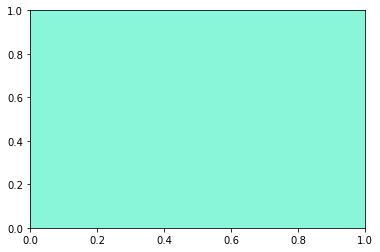

In [22]:
r = colors.loc[floodadv["PROD_TYPE"]].r[0]
g = colors.loc[floodadv["PROD_TYPE"]].g[0]
b = colors.loc[floodadv["PROD_TYPE"]].b[0]
print('#%02x%02x%02x' % (r,g,b))
plt.subplot(111, facecolor=(r/255,g/255,b/255))

In [95]:
[key for key in hazjson["features"][0]["properties"]]

['CAP_ID',
 'VTEC',
 'PHENOM',
 'SIG',
 'WFO',
 'EVENT',
 'ISSUANCE',
 'EXPIRATION',
 'ONSET',
 'ENDS',
 'URL',
 'MSG_TYPE',
 'PROD_TYPE']

In [96]:
for i in range(len(hazjson["features"][:10])):
    print(hazjson["features"][i]["properties"],"\n")

{'CAP_ID': 'urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92deabd942ece97494203d.001.1', 'VTEC': '/O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/', 'PHENOM': 'SC', 'SIG': 'Y', 'WFO': 'KMQT', 'EVENT': '0023', 'ISSUANCE': '2021-03-19T16:44:00-04:00', 'EXPIRATION': '2021-03-20T00:45:00-04:00', 'ONSET': '2021-03-20T15:00:00-04:00', 'ENDS': '2021-03-21T20:00:00-04:00', 'URL': 'https://alerts-v2.weather.gov/#/?id=urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92deabd942ece97494203d.001.1', 'MSG_TYPE': 'MWW', 'PROD_TYPE': 'Small Craft Advisory'} 

{'CAP_ID': 'urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92deabd942ece97494203d.001.1', 'VTEC': '/O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/', 'PHENOM': 'SC', 'SIG': 'Y', 'WFO': 'KMQT', 'EVENT': '0023', 'ISSUANCE': '2021-03-19T16:44:00-04:00', 'EXPIRATION': '2021-03-20T00:45:00-04:00', 'ONSET': '2021-03-20T15:00:00-04:00', 'ENDS': '2021-03-21T20:00:00-04:00', 'URL': 'https://alerts-v2.weather.gov/#/?id=urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92deabd942ece97

In [97]:
'#%02x%02x%02x' % (colors.r[0],colors.g[0],colors.b[0])

'#fdf43f'

In [98]:
colors.head(1)

,code,r,g,b,text
text,,,,,
Heavy Snow,1,253,244,63,Heavy Snow


In [99]:
colors['hex'] = colors.apply(lambda row: '#%02x%02x%02x' % (row.r,row.g,row.b), axis=1)

In [100]:
colors.head()

,code,r,g,b,text,hex
text,,,,,,
Heavy Snow,1,253,244,63,Heavy Snow,#fdf43f
Small Craft Advisory,1.1,152,123,93,Small Craft Advisory,#987b5d
Wind Advisory,1.10,245,159,245,Wind Advisory,#f59ff5
Wind Chill Advisory,1.11,132,90,156,Wind Chill Advisory,#845a9c
Blizzard Warning,1.1.1,255,255,213,Blizzard Warning,#ffffd5


In [101]:
len(['#%02x%02x%02x' % (colors.r[i],colors.g[i],colors.b[i]) for i,_ in enumerate(colors)])

6

In [102]:
len(colors)

213

In [104]:
def generate_color_txt(path=""):
    path = "/Users/chowdahead/Jupyter/Jupyter_Notebooks/"
    colors = pd.read_csv(f'{path}color_data.txt', delimiter='\t')
    colors.index = colors.text
    colors.replace('-', '')
    colors['hex'] = colors.apply(lambda row: '#%02x%02x%02x' % (row.r,row.g,row.b), axis=1)
    return(colors)

In [108]:
%%time
colors = generate_color_txt()


rivermap = folium.Map(location=[39.8283, -98.5795], tiles='Stamen Terrain', zoom_start=6)
#folium.LayerControl().add_to(rivermap)

# Create feature group to add to folium.Map object
layer = folium.FeatureGroup(name='Hazards', show=False)

# load GEOJSON, but don't add it to anything
temp_geojson = folium.GeoJson(warnjson)

style_function = lambda x: {'fillColor': colors.loc[x['properties']['PROD_TYPE']]['hex'],
                                'opacity': 1., 
                                'fillOpacity': .65,
                                'color': '#000000',
                                 "weight": 1.
                               }

# iterate over GEOJSON, style individual features, and add them to FeatureGroup
#for i,feature in enumerate(warnshp):
for i,feature in enumerate(temp_geojson.data['features']):
    # GEOJSON layer consisting of a single feature
   
    temp_layer = folium.GeoJson(feature,
                               #style_function=style
                               #style_function=lambda x:style
                               style_function=style_function,
                               )
    # lambda to add HTML
    #foo = lambda name, source: f"""
    #    <iframe id="popupIFrame"
    #        title="{name}"
    #        width="600"
    #        height="500"
    #        align="center"
    #        src="{source}">
    #    </iframe>
    #    """
    
    foo = lambda prod,wfo,iss,exp: f"""
            <div>
            <p>
            {prod}
            </p>
            <p>
            {wfo}
            </p>
            <p>
            {iss}
            </p>
            <p>
            {exp}
            </p>
            </div>
        
        """
    html=foo(f"Hazard - {feature['properties']['PROD_TYPE']}",
            f"WFO - {feature['properties']['WFO']}",
            f"Issuance - {feature['properties']['ISSUANCE'][:-9].replace('T',' ')}",
            f"Expires - {feature['properties']['EXPIRATION'][:-9].replace('T',' ')}")
    
    # create Popup and add it to our lone feature
    folium.Popup(
        html=html,max_width=2650
    ).add_to(temp_layer)
   
    # consolidate individual features back into the main layer
    temp_layer.add_to(layer)

#rivermap.fit_bounds(
#        [
#            [0, -135],
#            [70, -65],
#        ]
#    )

# add main layer to folium.Map object
layer.add_to(rivermap)


#rivermap
folium.Figure.save(rivermap,outfile="WPC_hazards_2021_03_10.html")

CPU times: user 10.9 s, sys: 369 ms, total: 11.2 s
Wall time: 11.4 s


---

In [67]:
# We first import the libraries. 
import pandas as pd
import folium 
from folium.plugins import StripePattern
import geopandas as gpd
import numpy as np
# Next we import the data. 
df = gpd.read_file("current_hazards.shp")

# We grab the state and wills column
df.head()

,CAP_ID,VTEC,PHENOM,SIG,WFO,EVENT,ISSUANCE,EXPIRATION,ONSET,ENDS,URL,MSG_TYPE,PROD_TYPE,geometry
0,urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92dea...,/O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/,SC,Y,KMQT,0023,2021-03-19T16:44:00-04:00,2021-03-20T00:45:00-04:00,2021-03-20T15:00:00-04:00,2021-03-21T20:00:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,MWW,Small Craft Advisory,"POLYGON ((-86.09259 45.96513, -86.09220 45.964..."
1,urn:oid:2.49.0.1.840.0.9fe8d0297cef9aceba92dea...,/O.NEW.KMQT.SC.Y.0023.210320T1900Z-210322T0000Z/,SC,Y,KMQT,0023,2021-03-19T16:44:00-04:00,2021-03-20T00:45:00-04:00,2021-03-20T15:00:00-04:00,2021-03-21T20:00:00-04:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,MWW,Small Craft Advisory,"POLYGON ((-86.64844 45.61599, -86.64756 45.615..."
2,urn:oid:2.49.0.1.840.0.7e59e3d5db6bf3d146078ab...,/O.CON.KOHX.FL.Y.0033.000000T0000Z-000000T0000Z/,FL,Y,KOHX,0033,2021-03-19T15:43:00-05:00,2021-03-20T03:45:00-05:00,2021-03-19T15:43:00-05:00,None,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,FLS,Flood Advisory,"POLYGON ((-88.05000 35.47000, -87.87000 35.470..."
3,urn:oid:2.49.0.1.840.0.2e4df0bec1e37aa7f8e91c6...,/O.NEW.KSGX.SC.Y.0016.210320T1700Z-210321T0800Z/,SC,Y,KSGX,0016,2021-03-19T13:33:00-07:00,2021-03-19T21:45:00-07:00,2021-03-20T10:00:00-07:00,2021-03-21T01:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,MWW,Small Craft Advisory,"POLYGON ((-117.98428 33.04737, -117.91336 33.0..."
4,urn:oid:2.49.0.1.840.0.ce5cbd320b9216ed5b28516...,/O.CON.KSTO.WW.Y.0016.000000T0000Z-210320T0700Z/,WW,Y,KSTO,0016,2021-03-19T13:33:00-07:00,2021-03-19T23:00:00-07:00,2021-03-19T13:33:00-07:00,2021-03-20T00:00:00-07:00,https://alerts-v2.weather.gov/#/?id=urn:oid:2....,WSW,Winter Weather Advisory,"POLYGON ((-120.84970 39.75821, -120.84579 39.7..."


In [68]:
df2 = df[["PROD_TYPE","geometry","WFO"]]


In [69]:
df2.head()

,PROD_TYPE,geometry,WFO
0,Small Craft Advisory,"POLYGON ((-86.09259 45.96513, -86.09220 45.964...",KMQT
1,Small Craft Advisory,"POLYGON ((-86.64844 45.61599, -86.64756 45.615...",KMQT
2,Flood Advisory,"POLYGON ((-88.05000 35.47000, -87.87000 35.470...",KOHX
3,Small Craft Advisory,"POLYGON ((-117.98428 33.04737, -117.91336 33.0...",KSGX
4,Winter Weather Advisory,"POLYGON ((-120.84970 39.75821, -120.84579 39.7...",KSTO


In [80]:
folium.GeoJson?